<a href="https://colab.research.google.com/github/vishnupriya528/project-linear-regression/blob/main/titanic_dataset_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import necessary libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [ ]:
train=pd.read_csv("/content/train (1).csv")#import dataset

In [ ]:
#data exploration

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.shape

(891, 12)

In [ ]:
round(train.isnull().sum()/train.shape[0]*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [ ]:
unnecessary_columns=['PassengerId','Cabin','Ticket','Name']

In [ ]:
train.drop(unnecessary_columns,axis=1,inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#data visualization

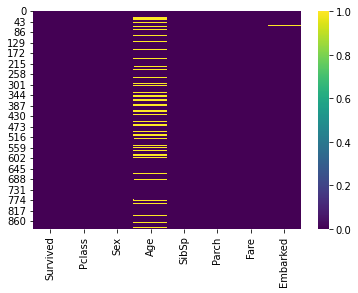

In [ ]:
sns.heatmap(train.isnull(),cmap='viridis')#missing values

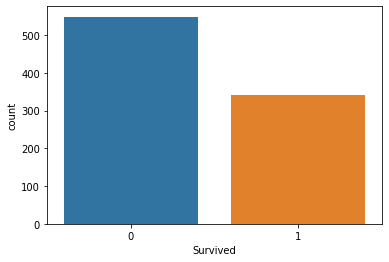

In [ ]:
sns.countplot(x='Survived',data=train)# o means not survived 1 means survived

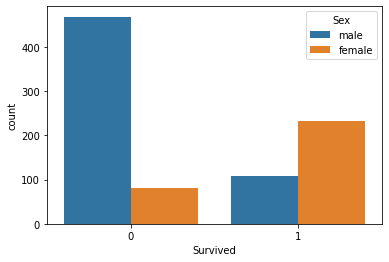

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train)

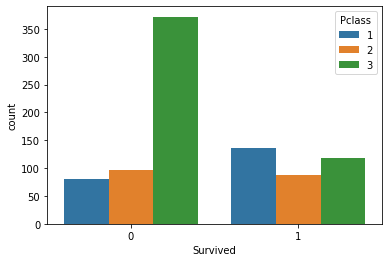

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


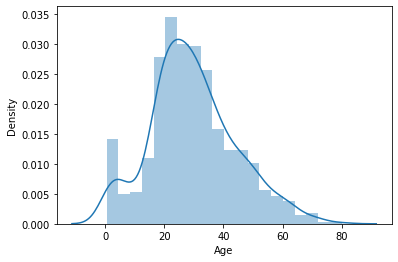

In [ ]:
sns.distplot(train['Age'])

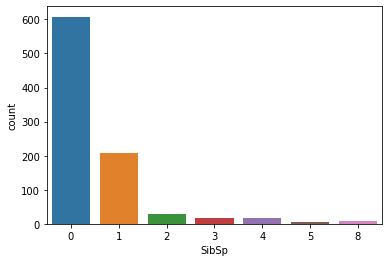

In [ ]:
sns.countplot(x='SibSp',data=train)

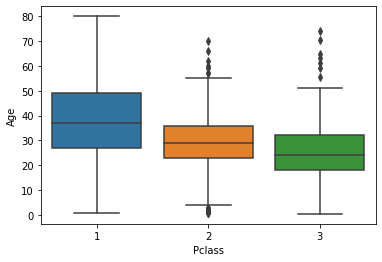

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=train)

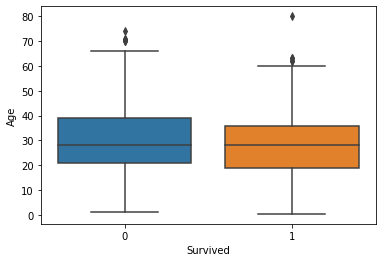

In [ ]:
sns.boxplot(x='Survived',y='Age',data=train)

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

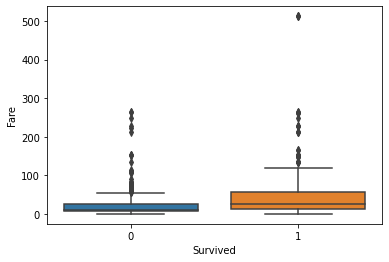

In [ ]:
sns.boxplot(x='Survived',y='Fare',data=train)

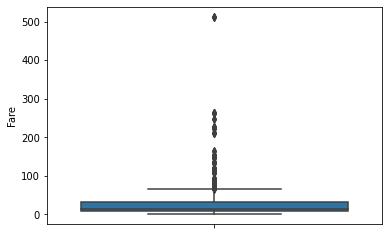

In [ ]:
sns.boxplot(y='Fare',data=train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


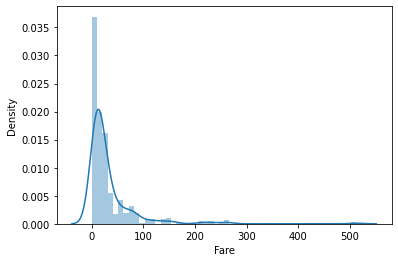

In [ ]:
sns.distplot(train["Fare"])

In [ ]:
train['Age'].mean()

29.69911764705882

In [ ]:
train['Age'].median()

28.0

In [ ]:
train['Age'].mode()

0    24.0
dtype: float64

In [ ]:
def age_impute(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 38
    elif Pclass==2:
      return 30
    else:
      return 25
  else:
    return Age

In [ ]:
train['Age']=train[["Age","Pclass"]].apply(age_impute,axis=1)

In [ ]:
train['Age'].isnull().sum()

0

In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [ ]:

train = pd.concat([train,sex, embark], axis = 1)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
X=train.drop(['Survived'],axis=1)

In [ ]:
y=train['Survived']

In [ ]:
#scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [ ]:
num_vars = ['Survived', 'Pclass', 'Age', 'SibSp','Fare']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=100)

In [ ]:
#Training

Hyperparameter Tunning

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {
    'penalty' : ['l1','l2','elasticnet'],
    'solver' : ['newton-cg','liblinear','lbfgs'] 
}

In [ ]:
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
clf = GridSearchCV(logreg,
             param_grid=parameters,
             scoring = "accuracy",
             cv=5)


In [ ]:
import warnings
warnings.filterwarnings('ignore')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs']},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
clf.best_score_

0.8118322580645161

In [ ]:
#Model Building

In [ ]:
logreg = LogisticRegression(penalty='l2',solver = 'newton-cg')
logreg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
logreg.score(X_test,y_test)

0.7865168539325843

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       160
           1       0.76      0.68      0.72       107

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.78      0.79      0.78       267



In [ ]:
#K nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier()

In [ ]:
KNNClassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
KNNClassifier.score(X_test,y_test)

0.6779026217228464

In [ ]:
y_pred = KNNClassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       160
           1       0.61      0.55      0.58       107

    accuracy                           0.68       267
   macro avg       0.66      0.66      0.66       267
weighted avg       0.67      0.68      0.67       267

